# `random_spheres`
Generates randomly located, non-overlapping spheres using the 'random sequential addition' technique. 

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np
ps.visualization.set_mpl_style()

## `im` or `shape`
The function can either add spheres an existing image, or create a new image of the given shape and add spheres to that.  Let's start with an empty image, and set the void fraction to a low value:

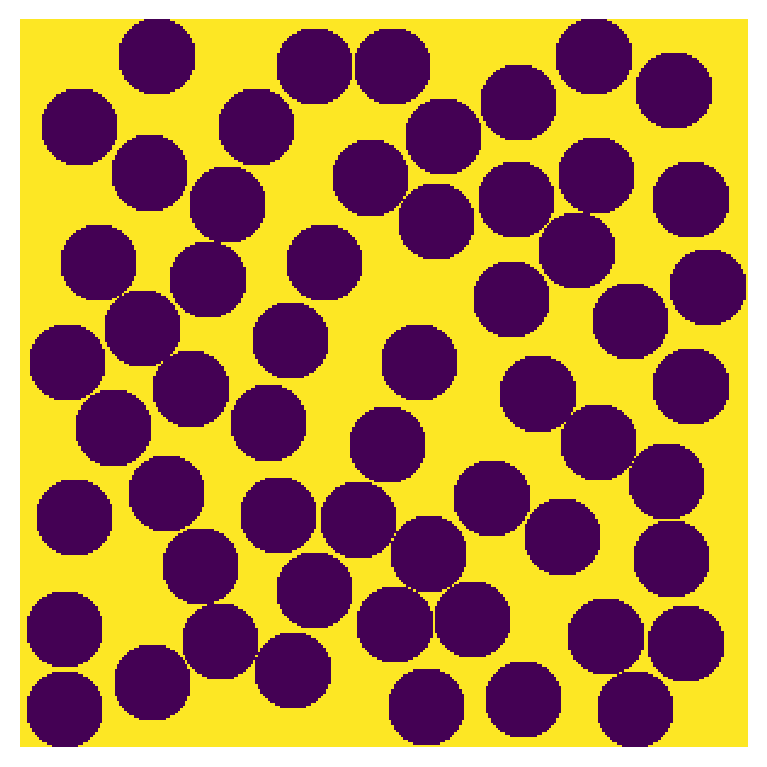

In [2]:
shape = [300, 300]
r = 15
im = ps.generators.random_spheres(shape=shape, r=r)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.axis(False)
ax.imshow(im, origin='lower', interpolation='none');

Now let's fill up the remaining space with as many smaller spheres as possible:

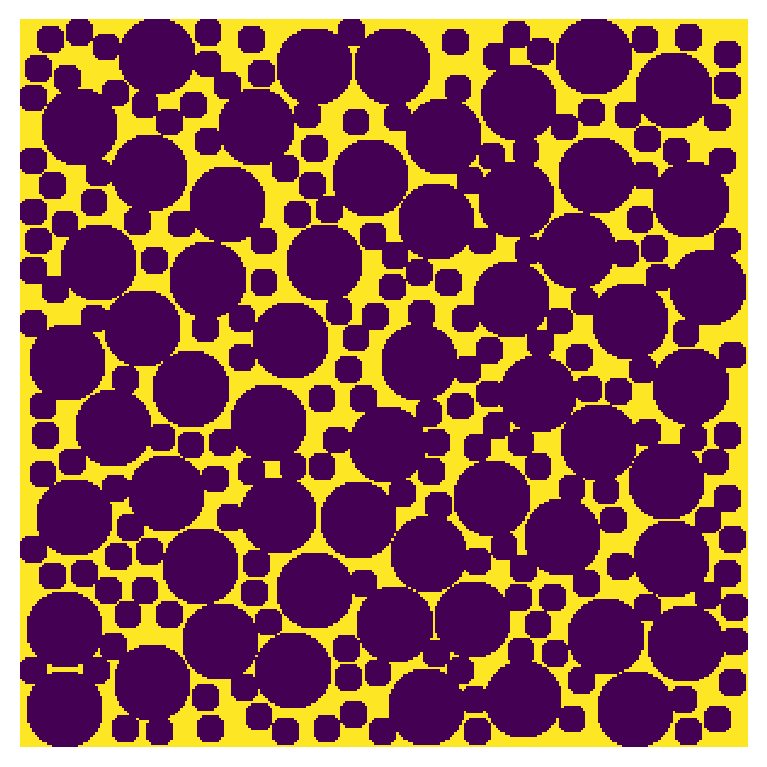

In [3]:
r = 5
im = ps.generators.random_spheres(im=im, r=r)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.axis(False)
ax.imshow(im, origin='lower', interpolation='none');

## `edges`
Spheres can either be fully contained within the image or be truncated at the edges:

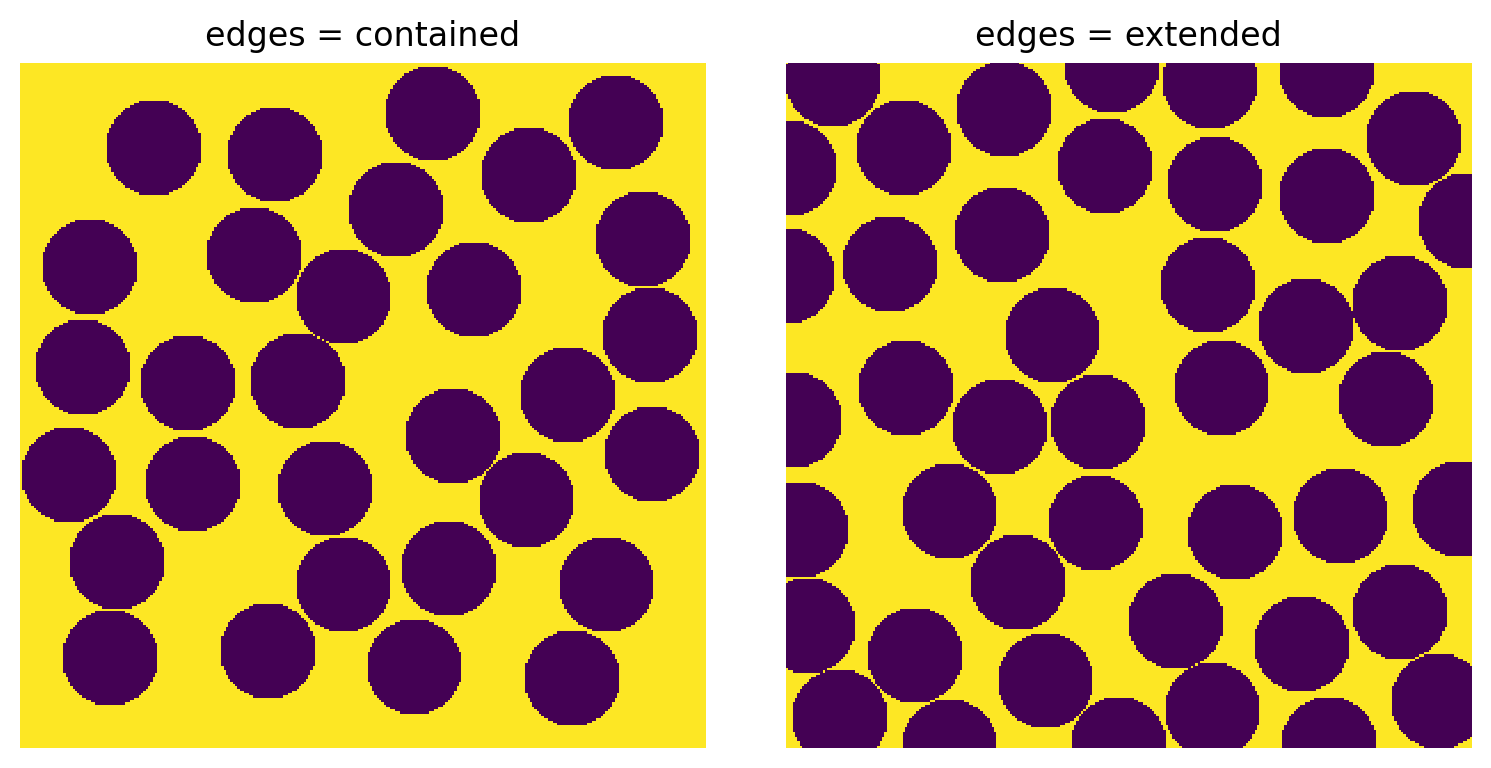

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

r = 20
mode = 'contained'
im1 = ps.generators.random_spheres(shape=shape, r=r, edges=mode)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'edges = {mode}')

mode = 'extended'
im2 = ps.generators.random_spheres(shape=shape, r=r, edges=mode)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False)
ax[1].set_title(f'edges = {mode}');

## `clearance`
Spheres can be made to partially overlap, the so called 'cherry pit' model, or to have some clearance:

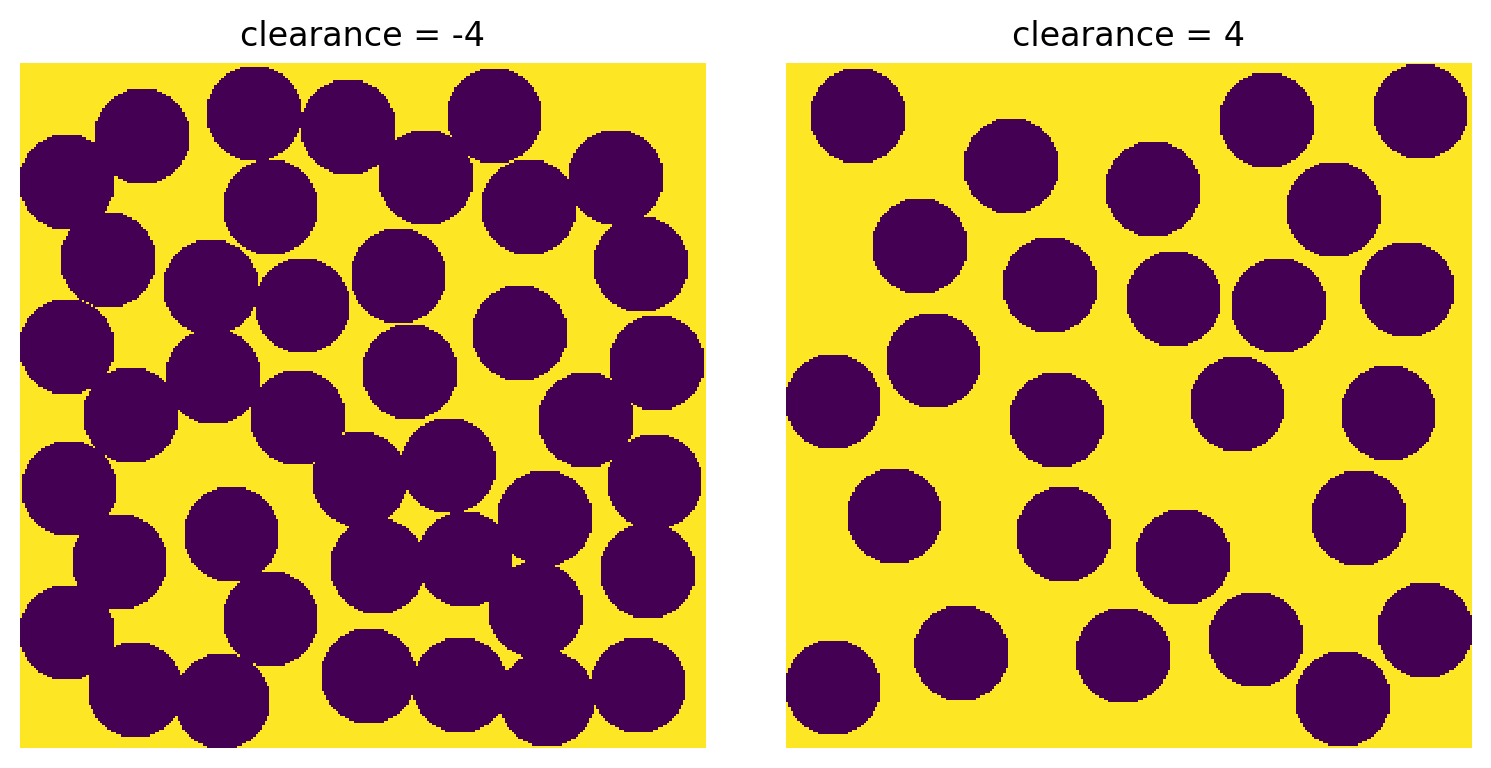

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

c = -4
im1 = ps.generators.random_spheres(shape=shape, r=r, clearance=c)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'clearance = {c}')

c = 4
im2 = ps.generators.random_spheres(shape=shape, r=r, clearance=c)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False)
ax[1].set_title(f'clearance = {c}');

## `protrusion`

This controls how much the added spheres are allowed to protrude into the background. 

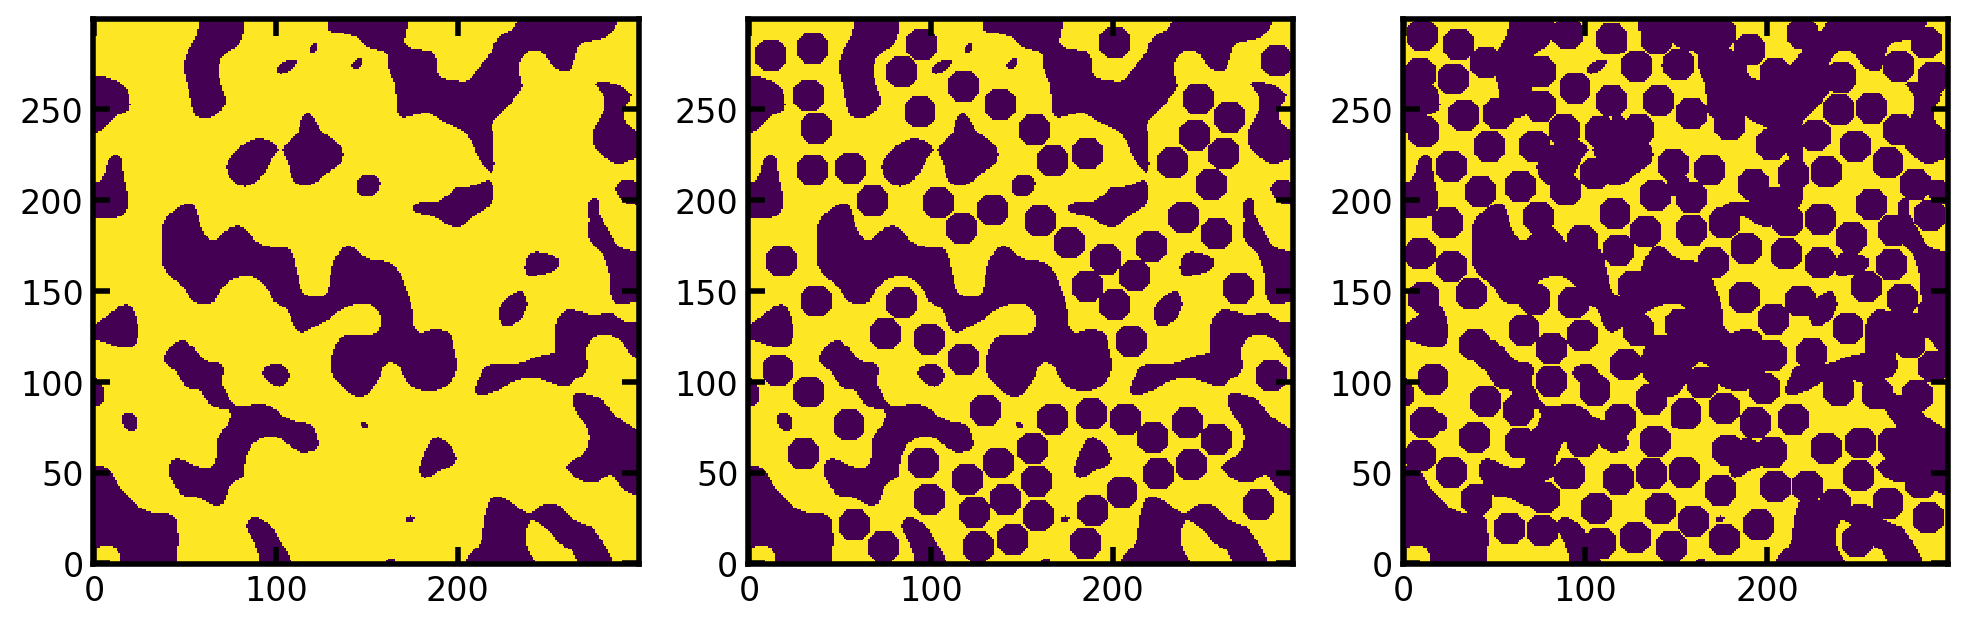

In [21]:
im1 = ps.generators.blobs(shape=[300, 300], porosity=0.7)
im2 = ps.generators.random_spheres(im=im1, r=8, protrusion=-5)
im3 = ps.generators.random_spheres(im=im1, r=8, protrusion=5)

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[2].imshow(im3, origin='lower', interpolation='none');

In the case of pre-existing spheres this can be used to give some clearance between existing spheres and new ones by using a negative value:

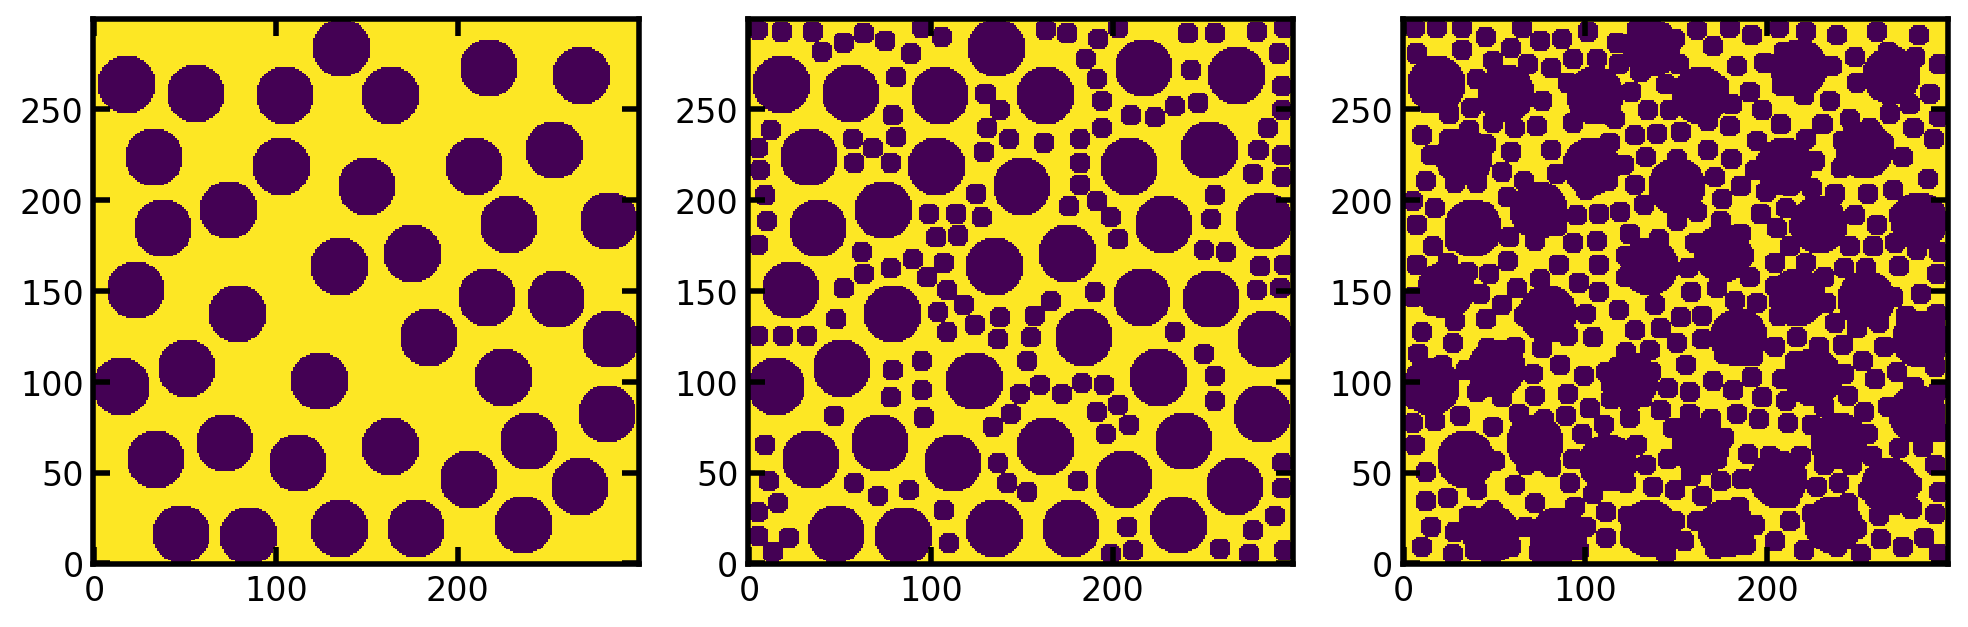

In [6]:
im1 = np.ones([300, 300])
im2 = ps.generators.random_spheres(im=im1, r=15, clearance=5)
im3 = ps.generators.random_spheres(im=im2, r=5, protrusion=-5)
im4 = ps.generators.random_spheres(im=im2, r=5, protrusion=5)

fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].imshow(im2, origin='lower', interpolation='none')
ax[1].imshow(im3, origin='lower', interpolation='none')
ax[2].imshow(im4, origin='lower', interpolation='none');

## `phi` and `maxiter`

The number of spheres to add can be controlled directly by specifying `maxiter`, or implicitly by specifying `phi` (the solid volume fraction).  Setting `phi` will attempt to compute the correct value of `maxiter` internally so will not give the exact `phi` requested:

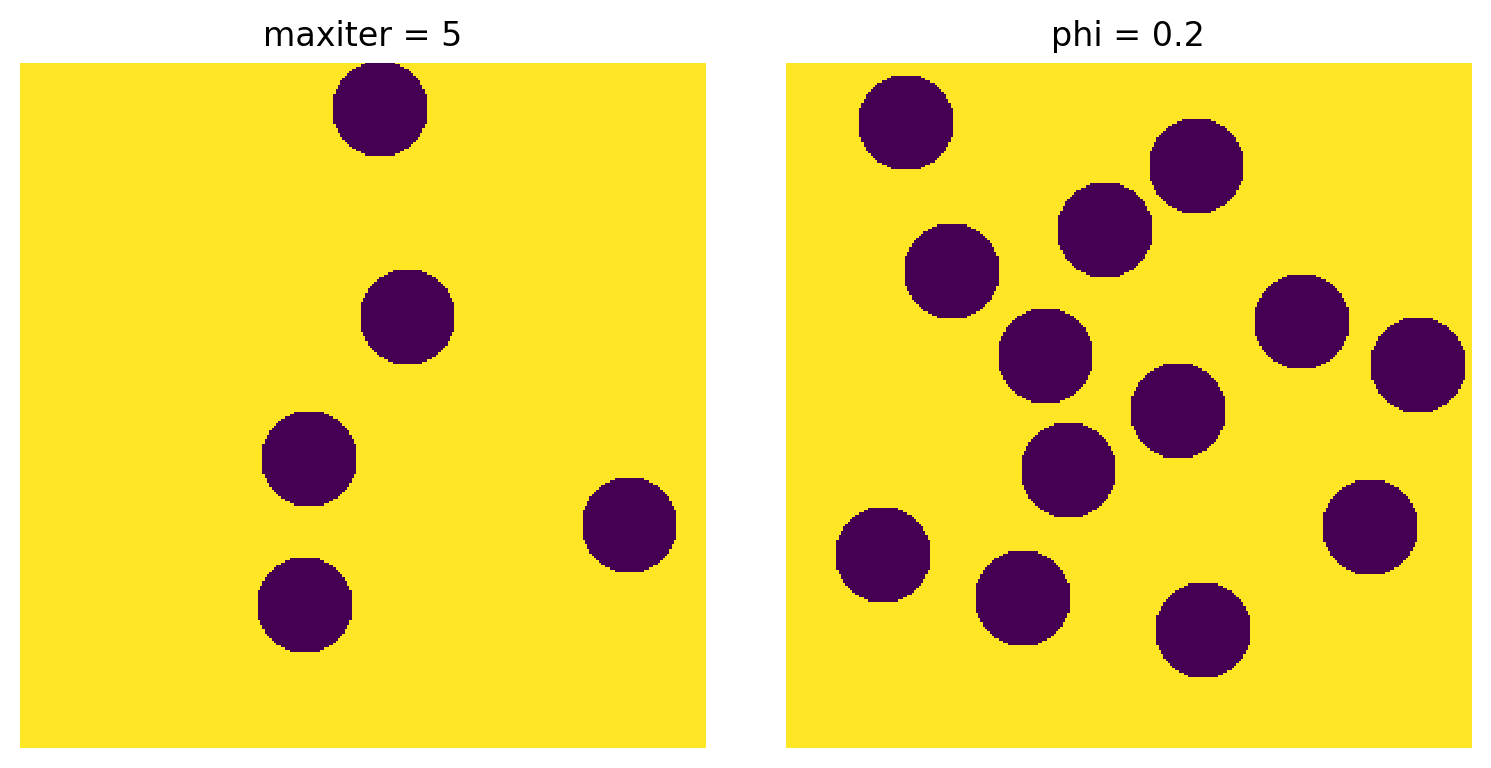

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

maxiter = 5
im1 = ps.generators.random_spheres(shape=shape, r=r, clearance=c, maxiter=maxiter)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'maxiter = {maxiter}')

vf = 0.2
im2 = ps.generators.random_spheres(shape=shape, r=r, clearance=c, phi=vf)
ax[1].axis(False)
ax[1].set_title(f'phi = {vf}')
ax[1].imshow(im2, origin='lower', interpolation='none');

## `smooth`

Controls whether or not the inserted spheres have the little nibs or pips on each face.  Note that if `smooth=True`, then `r` is increased by 1 to ensure the radius of the inserted spheres matches the requested value.

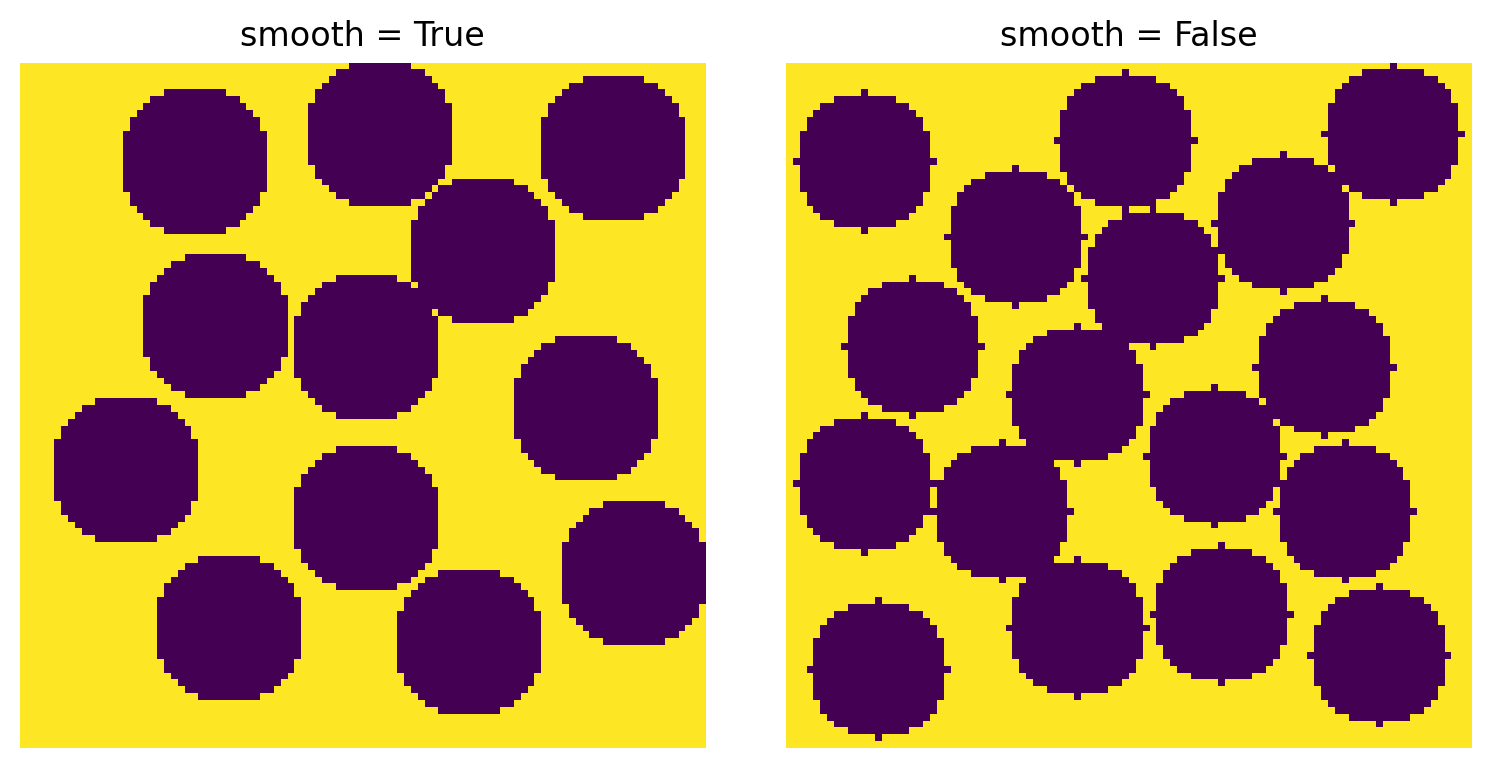

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

smooth = True
im1 = ps.generators.random_spheres(shape=[100, 100], r=10, smooth=smooth)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'smooth = {smooth}')

smooth = False
im2 = ps.generators.random_spheres(shape=[100, 100], r=10, smooth=smooth)
ax[1].axis(False)
ax[1].set_title(f'smooth = {smooth}')
ax[1].imshow(im2, origin='lower', interpolation='none');

## `seed`

This function uses `numba` to accelerate the insertion process, which means that the `numpy` random number generator is *not* used.  To generate a repeatable realization of the spheres, pass an integer value to the `seed` argument:

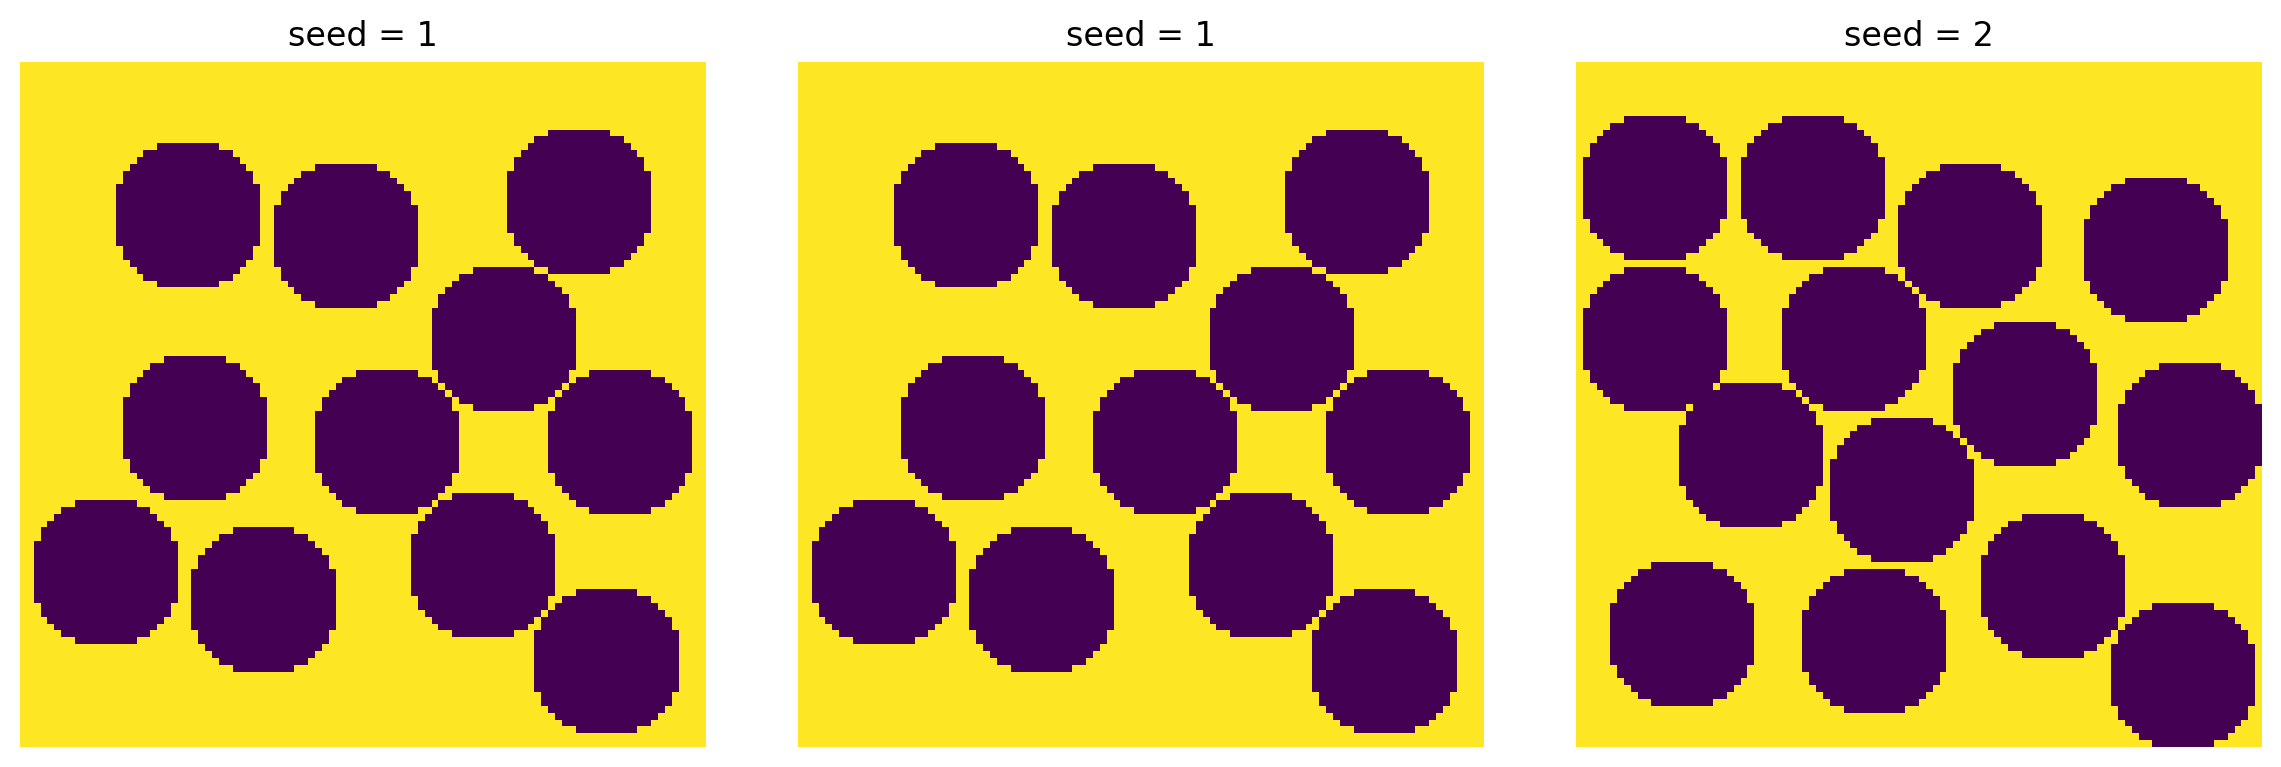

In [9]:
fig, ax = plt.subplots(1, 3, figsize=[12, 4])

seed = 1
im1 = ps.generators.random_spheres(shape=[100, 100], r=10, seed=seed)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'seed = {seed}')

seed = 1
im2 = ps.generators.random_spheres(shape=[100, 100], r=10, seed=seed)
ax[1].axis(False)
ax[1].set_title(f'seed = {seed}')
ax[1].imshow(im2, origin='lower', interpolation='none')

seed = 2
im2 = ps.generators.random_spheres(shape=[100, 100], r=10, seed=seed)
ax[2].axis(False)
ax[2].set_title(f'seed = {seed}')
ax[2].imshow(im2, origin='lower', interpolation='none');

## `value`

The default behavior is to insert spheres with values of `0` or `False`, but this can be specified using the `value` argument.  This is useful when inserting several different sizes of spheres sequentially:

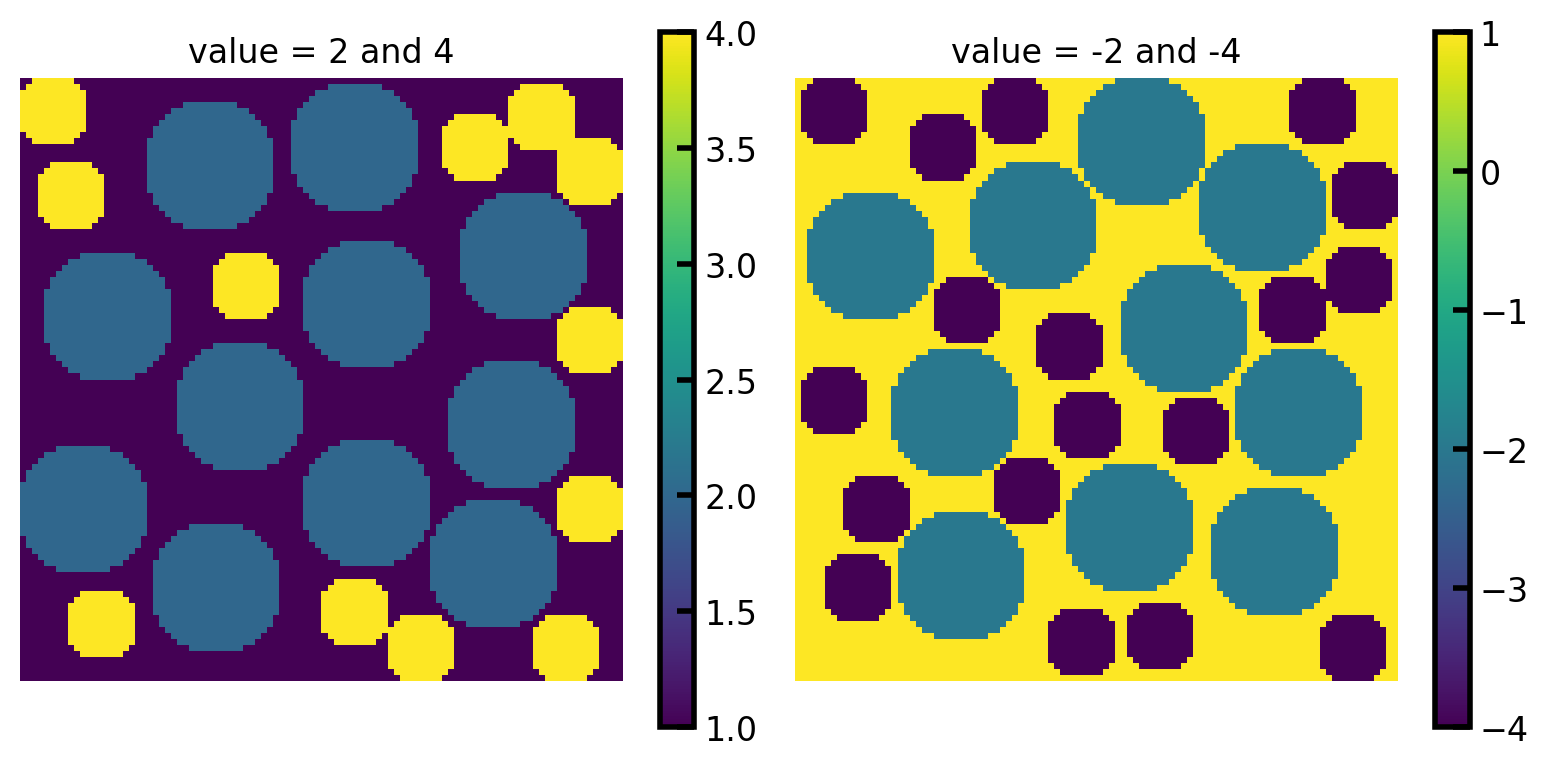

In [14]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

value = 2
im1 = ps.generators.random_spheres(shape=[100, 100], r=10, value=value)
im1 = ps.generators.random_spheres(im=im1, r=5, value=value+2, protrusion=-2)
h = ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[0].set_title(f'value = {value} and {value + 2}')
fig.colorbar(h)

value = -2
im2 = ps.generators.random_spheres(shape=[100, 100], r=10, value=value)
im2 = ps.generators.random_spheres(im=im2, r=5, value=value-2, protrusion=-2)
h = ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False)
ax[1].set_title(f'value = {value} and {value - 2}')
fig.colorbar(h);